<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
SERVICE CHURN PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">A CUSTOMER CHRUN IS TAKEN FOR MAKING MODEL USING THE LASSO REGULARIZATION IN MODEL<br>
    
<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
This project aims to predict customer churn using historical data. By identifying at-risk customers, we can inform targeted retention strategies.

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
IMPORT LIBRARIES</h1>

In [14]:
!pip install matplotlib

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve

In [4]:
!pip install shap

In [5]:
## model interpretability

import shap # It provides insights into how features contribute to the predictions made by a model,
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('chrun.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols
cat_but_car

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


['customerID', 'TotalCharges']

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


['tenure', 'MonthlyCharges']

In [13]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

df_base = one_hot_encoder(df, cat_cols)

In [14]:
df_base.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_0,SeniorCitizen_1
0,7590-VHVEG,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,1,0
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0


In [15]:
required_features = [
    'tenure', 
    'MonthlyCharges', 
    'TotalCharges', 
    'Churn_Yes']


new_df = df_base[required_features]
    

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
 3   Churn_Yes       7043 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 192.7+ KB


In [17]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
new_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn_Yes
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


In [20]:
new_df = new_df.dropna()

In [21]:
# Standardize numerical columns
scaler = StandardScaler()

X = new_df.drop('Churn_Yes', axis=1)
y = new_df['Churn_Yes']


In [22]:
new_df.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
Churn_Yes         0
dtype: int64

In [23]:
x = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
new_df.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
Churn_Yes         0
dtype: int64

In [26]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C is inverse of regularization strength
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [27]:
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7796730632551528
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



In [28]:
# Hyperparameter Tuning with GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.7918222222222223


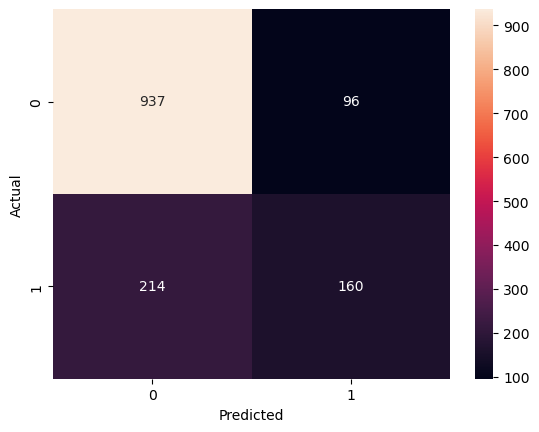

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


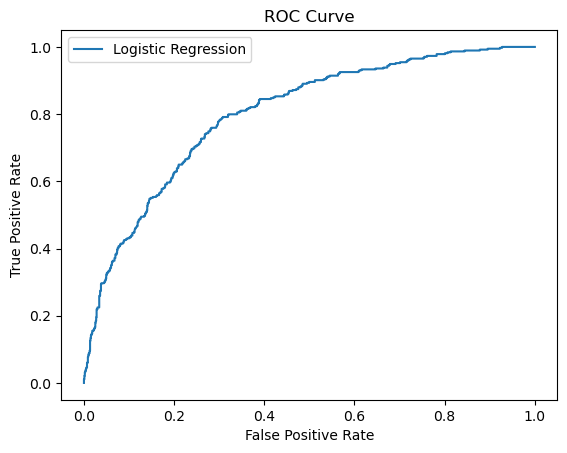

AUC: 0.7999906818311238


In [33]:
## ROC CURVE AND AUC

y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr,tpr, thersholds = roc_curve(y_test,y_pred_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC:", roc_auc_score(y_test, y_pred_prob))

# conculsion:

Based on the findings, we recommend focusing on factors like [top features] to help retain customers who might be at risk of churning.